In [1]:
import importlib, imports, functions; importlib.reload(functions)

<module 'functions' from '/Users/Ricardo/Desktop/IRONHACK/Bootcamp/Week_5/Project/vanguard-ab-test/notebooks/functions.py'>

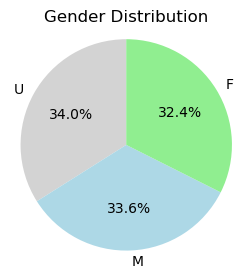

In [2]:
functions.gender_piechart(imports.df_clients)

# Client Gender

- **Distribution**: About a third of the clients have not provided their gender in their accounts sign in (U). From those that have, males are slightly more than females. 

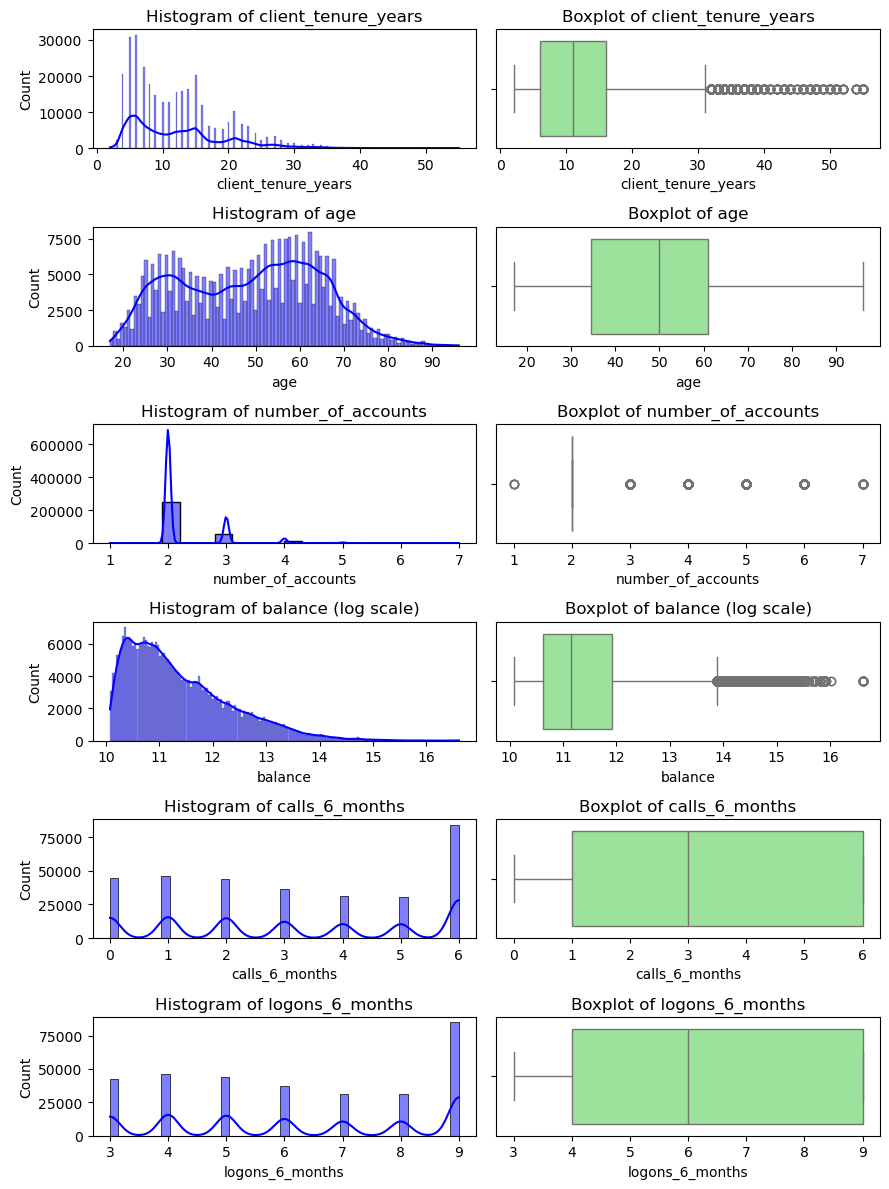

In [3]:
functions.all_charts(imports.df_clients)

# Distribution Insights for Client Variables

## 1. Client Tenure Years
- **Type**: Discrete integer
- **Distribution**: Right-skewed, possibly exponential
- **Skew**: Positive (long tail to the right)
- **Outliers**: A few clients with unusually long tenure, this is weird since the group was founded in 1975, so 42 yrs old according to research team!!!
- **Comment**: Most clients are relatively new (1–3 years), with a small group of long-standing clients.

## 2. Age
- **Type**: Continuous
- **Distribution**: Bimodal, possibly mixture of normals
- **Skew**: Slightly positive
- **Outliers**: Some very young and very old clients
- **Comment**: Two main age clusters suggest distinct client segments — possibly younger digital users and older legacy clients.

## 3. Number of Accounts
- **Type**: Discrete integer
- **Distribution**: Strong left skew, resembles geometric
- **Skew**: Positive
- **Outliers**: Clients with 3+ accounts are rare
- **Comment**: Most clients hold 2 accounts and the decline is rapid.

## 4. Balance (Log Scale)
- **Type**: Continuous (log-transformed)
- **Distribution**: Log-normal
- **Skew**: Reduced due to log scale, but still right-skewed
- **Outliers**: High balances still visible post-transform
- **Comment**: Most clients have modest balances, with a small group holding significantly more — typical wealth distribution.

## 5. Calls in 6 Months
- **Type**: Discrete integer
- **Distribution**: Multimodal, possibly zero-inflated Poisson
- **Skew**: Positive
- **Outliers**: Clients with 10+ calls are rare
- **Comment**: Many clients made no calls, while others show light engagement — may reflect digital vs. phone-preferred users.

## 6. Logons in 6 Months
- **Type**: Discrete integer
- **Distribution**: Multimodal, possibly compound Poisson
- **Skew**: Moderate positive
- **Outliers**: Heavy users with 100+ logons
- **Comment**: Usage patterns vary widely — some clients log in frequently, others rarely. Indicates behavioral segmentation potential.


In [4]:
imports.df_clients['client_tenure_years'].describe()

count   317235.00
mean        12.18
std          6.96
min          2.00
25%          6.00
50%         11.00
75%         16.00
max         55.00
Name: client_tenure_years, dtype: float64

In [5]:
# print balance acumulated
not_outliers_bal = (imports.df_clients[imports.df_clients['client_tenure_years'] < 42]['balance'].sum())
outliers_bal = (imports.df_clients[imports.df_clients['client_tenure_years'] >= 42]['balance'].sum())
# ratio
outliers_bal / not_outliers_bal

np.float64(0.0019085770313193784)

##### These clients represent approx. 2.0 % of the account balance of all clients that have less than 42 yrs tenure, therefore, since it is a relevant percentage we are keeping them in the analysis.

In [6]:
# We need to create correlation matrix and then plot it using heatmap. So gender have to be map as numerical as test and control.

# Convert categorical variables to numerical
imports.df_full["gender_num"], gender_mapping = imports.pd.factorize(imports.df_full["gender"])
imports.df_full["variation_num"], variation_mapping = imports.pd.factorize(imports.df_full["variation"])

print("Gender Mapping:")
for num, category in enumerate(gender_mapping):
    print(f"{category} → {num}")
    
print("\nVariation Mapping:")
for num, category in enumerate(variation_mapping):
    print(f"{category} → {num}")

Gender Mapping:
U → 0
M → 1
F → 2

Variation Mapping:
Test → 0
Control → 1


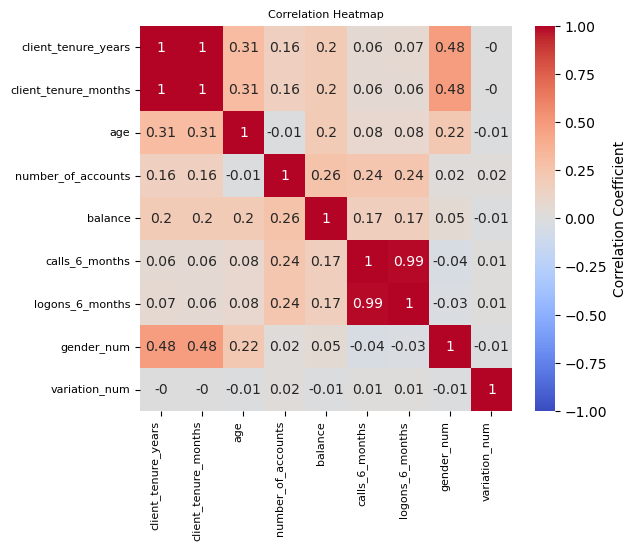

In [7]:
functions.correlation_matrix(imports.df_full)

# Correlation Insights

## Strong Correlations
- **client_tenure_years ↔ client_tenure_months**: `+1.00`
  - Perfect correlation (as expected, months = years × 12)
  - Redundant for modeling — we'll keep one

- **logons_6_months ↔ calls_6_months**: `+0.99`
  - Clients with higher numbers of logins tend to call more
  - Maybe the two (2) of them can be redundant, keep one

## Moderate Correlations
- **client_tenure_years ↔ gender_num**: `0.48`
  - Gender appears linked to tenure — possible demographic skew also have 0.22 with age, weak and not strong for conclusions. 
  - Consider stratified sampling or fairness checks
  
- **client_tenure_years ↔ age**: `0.31`
  - Client tenure in years and age are moderate positive correlation.
  - Expected

## Weak or No Correlations
- **age, number_of_accounts, logons_6_months**: mostly weak correlations
  - These variables behave independently
  - Useful for segmentation or clustering
- **variation**: is virtually zero, so the assigment to client confirms more to be random! very good for A/B testing.

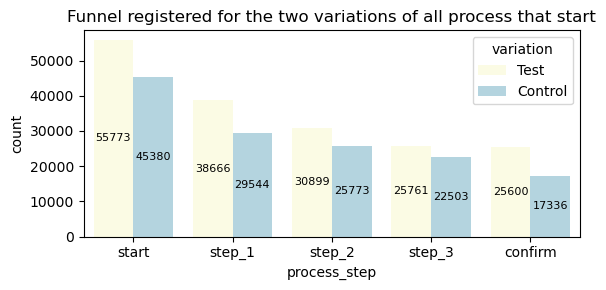

In [8]:
functions.completion_rate(imports.df_full)

In [9]:
functions.page_visits(imports.df_full)

  client_id variation  total_visits
0   1000062   Control             5
1   1000353   Control             7
2   1000536   Control             7
3   1000672   Control             5
4   1001101      Test            14


,client_id,variation,total_visits
0,1000062,Control,5
1,1000353,Control,7
2,1000536,Control,7
3,1000672,Control,5
4,1001101,Test,14
...,...,...,...
50495,9999150,Test,3
50496,9999400,Test,5
50497,9999626,Test,2
50498,9999729,Test,11


  client_id variation  total_visits
0   1000062   Control             5
1   1000353   Control             7
2   1000536   Control             7
3   1000672   Control             5
4   1001101      Test            14


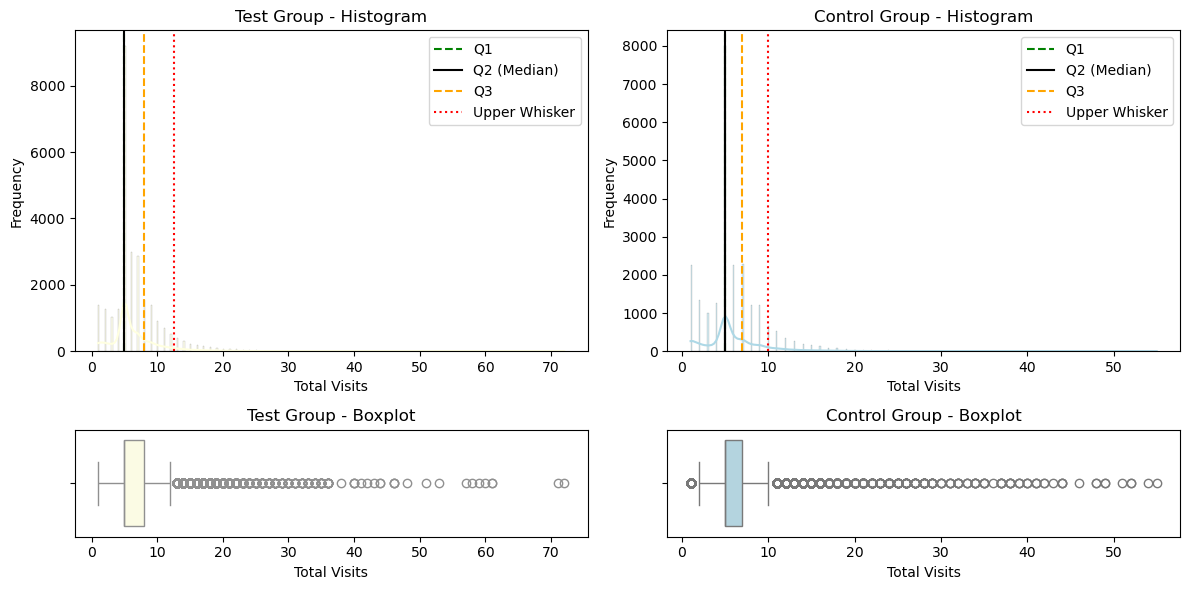

In [10]:
df_visits = functions.page_visits(imports.df_full)
functions.boxplot_histogram(df_visits)

In [15]:
importlib.reload(functions)

<module 'functions' from '/Users/Ricardo/Desktop/IRONHACK/Bootcamp/Week_5/Project/vanguard-ab-test/notebooks/functions.py'>

In [16]:
functions.exceed_upper_whisker(df_visits)

There are 5162 clients that exceed the upper whisker.



4        1001101
5        1001135
12       1002001
13       1002004
20       1002905
          ...   
50474    9995084
50480    9996404
50487    9997470
50489    9998346
50498    9999729
Name: client_id, Length: 5162, dtype: object

In [17]:
outliers_visits_clients = functions.exceed_upper_whisker(df_visits)
#df_clean = functions.drop_outliers(imports.df_full, outliers_visits_clients)

There are 5162 clients that exceed the upper whisker.



In [18]:
    # Visits that have 'confirm' registered as one of their steps
confirm_visits = imports.df_full[imports.df_full['process_step'] == 'confirm']['visit_id'].unique()
    # So assign them a 'confirm' value if True, or no_confirm if it isn't
imports.df_full['confirm_check'] = imports.df_full['visit_id'].isin(confirm_visits).map({True: 'True', False: 'False'})

In [20]:
# Apply this filter to the df_full dropping the outliers
imports.df_full = imports.df_full[~imports.df_full['client_id'].isin(outliers_visits_clients)]
# Add total_visits column
imports.df_full['total_visits'] = imports.df_full.groupby('client_id')['visit_id'].transform('count')
# Drop client_tenure_months
df_full = imports.df_full.drop(columns=['client_tenure_months'])

In [21]:
total_visits = imports.df_full.groupby('variation')['visit_id'].nunique()

    # Totals per variation
n_test_total = imports.df_full.groupby('variation')['visit_id'].nunique()['Test']
n_control_total = imports.df_full.groupby('variation')['visit_id'].nunique()['Control']

    # Confirmed visits for each variation
confirmed_visits = imports.df_full[imports.df_full['confirm_check'] == 'True'].groupby('variation')['visit_id']

    # Total visits with no_cofirm per variation
n_test_nonvalidated = confirmed_visits.nunique()['Test']
n_control_nonvalidated = confirmed_visits.nunique()['Control']

    # Proportions
p_test_nonvalidated = n_test_nonvalidated / n_test_total
p_control_nonvalidated = n_control_nonvalidated / n_control_total

    # Results
print(f"Of total {n_test_total} test visits, {n_test_nonvalidated} reached the 'confirm' step.")
print(f"Of total {n_control_total} control visits, {n_control_nonvalidated} reached the 'confirm' step.")

Of total 29579 test visits, 18328 reached the 'confirm' step.
Of total 26584 control visits, 14209 reached the 'confirm' step.


In [23]:
# Define required funnel steps
funnel_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
required_steps = set(funnel_steps)

# Total visits per variation
total_visits = imports.df_full.groupby('variation')['visit_id'].nunique()
n_test_total = total_visits.get('Test', 0)
n_control_total = total_visits.get('Control', 0)

# Group visit_id by steps completed
visit_steps = imports.df_full.groupby('visit_id')['process_step'].apply(set)

# Filter visits that completed all funnel steps
valid_visit_ids = visit_steps[visit_steps.apply(lambda steps: required_steps.issubset(steps))].index

# Get variation for each valid visit
valid_variations = imports.df_full[imports.df_full['visit_id'].isin(valid_visit_ids)][['visit_id', 'variation']].drop_duplicates()

# Count valid visits per variation
valid_counts = valid_variations['variation'].value_counts()
n_test_valid = valid_counts.get('Test', 0)
n_control_valid = valid_counts.get('Control', 0)

# Proportions
p_test_valid = n_test_valid / n_test_total if n_test_total > 0 else 0
p_control_valid = n_control_valid / n_control_total if n_control_total > 0 else 0

# Results
print("KPI === COMPLETION RATE")
print(f"Of total {n_test_total} test visits, {n_test_valid} valid visits completed the full funnel ({p_test_valid}).")
print(f"Of total {n_control_total} control visits, {n_control_valid} valid visits completed the full funnel ({p_control_valid}).")
print(f"The lift is {p_test_valid - p_control_valid}. to be tested with hypothesis test" )

KPI === COMPLETION RATE
Of total 29579 test visits, 15551 valid visits completed the full funnel (0.5257446161127827).
Of total 26584 control visits, 13283 valid visits completed the full funnel (0.49966145049653926).
The lift is 0.02608316561624341. to be tested with hypothesis test


In [25]:
# Ensure timestamps are in datetime format
imports.df_full['timestamp'] = imports.pd.to_datetime(df_full['date_time'])

# Sort by visit and timestamp
df_sorted = imports.df_full.sort_values(['visit_id', 'date_time'])

# Compute time difference between steps
df_sorted['step_duration'] = df_sorted.groupby('visit_id')['date_time'].diff()

# Drop rows where duration is NaT (first step per visit)
df_step_times = df_sorted.dropna(subset=['step_duration'])

# Aggregate: average time per step per variation
kpi_step_time = df_step_times.groupby(['variation', 'visit_id', 'process_step'])['step_duration'].mean().reset_index()

# Optional: convert to seconds
kpi_step_time['step_duration_seconds'] = kpi_step_time['step_duration'].dt.total_seconds()

In [26]:
# Preview
kpi_step_time.head()

,variation,visit_id,process_step,step_duration,step_duration_seconds
0,Control,100037962_47432393712_705583,start,0 days 00:00:46.500000,46.50
1,Control,100037962_47432393712_705583,step_1,0 days 00:00:39,39.00
2,Control,100057941_88477660212_944512,step_1,0 days 00:00:28.500000,28.50
3,Control,100057941_88477660212_944512,step_2,0 days 00:00:53.500000,53.50
4,Control,100057941_88477660212_944512,step_3,0 days 00:00:45,45.00


In [28]:
df = imports.df_full.copy()
df['timestamp'] = imports.pd.to_datetime(df['timestamp'])

# Sort by visit and timestamp
df = df.sort_values(['visit_id', 'timestamp'])

# Get next step and next timestamp per visit
df['next_step'] = df.groupby('visit_id')['process_step'].shift(-1)
df['next_time'] = df.groupby('visit_id')['timestamp'].shift(-1)

# Duration spent on current step = time until next step, for rows that have a next_time
df.loc[:, 'step_duration'] = df['next_time'] - df['timestamp']

# Enforce convention: confirm has zero duration (terminal step)
df.loc[df['process_step'] == 'confirm', 'step_duration'] = imports.pd.Timedelta(seconds=0)

# Keep only rows where step_duration is not null (we want steps with a defined duration or explicit zero)
df_step_times = df[df['step_duration'].notna()].copy()

# Convert to seconds using .loc to avoid SettingWithCopyWarning
df_step_times.loc[:, 'step_duration_seconds'] = df_step_times['step_duration'].dt.total_seconds()

# Optional: ensure consistent step order
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Pivot: mean duration per step per variation
pivot_step_time = (
    df_step_times
    .groupby(['process_step', 'variation'])['step_duration_seconds']
    .mean()
    .unstack(fill_value=0)
    .reindex(step_order)  # will put rows in desired order; missing rows become NaN
    .round(2)
)

# Replace NaN with 0 for steps that may be missing
pivot_step_time = pivot_step_time.fillna(0)

print(pivot_step_time)

variation     Control   Test
process_step                
start           57.46  51.39
step_1          46.56  56.53
step_2          94.35  92.32
step_3         129.58 111.67
confirm          0.00   0.00


In [29]:
# Define the canonical process step order (adjust names to match your data)
process_step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Work directly on df_full and ensure datetime
df_full = imports.df_full.copy()
df_full['date_time'] = imports.pd.to_datetime(df_full['date_time'])

# Map process steps to numeric order
step_map = {step: i for i, step in enumerate(process_step_order)}
df_full.loc[:, 'process_step_order'] = df_full['process_step'].map(step_map)

# Sort by visit_id and date_time for correct order of events
df_full = df_full.sort_values(['visit_id', 'date_time'])

# Compute previous step and previous step order within each visit
df_full.loc[:, 'prev_step'] = df_full.groupby('visit_id')['process_step'].shift(1)
df_full.loc[:, 'prev_step_order'] = df_full.groupby('visit_id')['process_step_order'].shift(1)

# Flag: same step repeated consecutively within the same visit
df_full.loc[:, 'step_repeat_error'] = (
    (df_full['process_step'] == df_full['prev_step']) &
    (df_full['visit_id'] == df_full['visit_id'].shift(1))
).astype(int)

# Flag: user moved back to an earlier step (previous step order > current step order)
df_full.loc[:, 'step_back_error'] = (
    (df_full['prev_step_order'].notna()) &
    (df_full['prev_step_order'] > df_full['process_step_order']) &
    (df_full['visit_id'] == df_full['visit_id'].shift(1))
).astype(int)

# Aggregate errors per visit_id and process_step (keep variation for grouping)
error_df = (
    df_full
    .groupby(['visit_id', 'process_step'], as_index=False)
    .agg(
        variation=('variation', 'first'),
        step_repeat_errors=('step_repeat_error', 'sum'),
        step_back_errors=('step_back_error', 'sum')
    )
)

# Aggregate total errors per variation
error_summary = (
    error_df
    .groupby('variation', as_index=False)
    .agg(
        total_step_back_errors=('step_back_errors', 'sum'),
        total_step_repeat_errors=('step_repeat_errors', 'sum')        
    )
)
print(error_summary) 

  variation  total_step_back_errors  total_step_repeat_errors
0   Control                    5521                      7298
1      Test                    8138                     11139


#### Completion Rate Test
#####   H1: Clients using UI Test have a higher completion rate than those using UI Control.
#####    H0: There is not significant difference in completion rate between UI Test and UI Control.

In [30]:
print(f"Test Completion Rate: {p_test_valid:.2%}")
print(f"Control Completion Rate: {p_control_valid:.2%}")

Test Completion Rate: 52.57%
Control Completion Rate: 49.97%


In [32]:
# Formula reduces to ∆ ∓ z (SEtest + SEctrl)

# z = ?
z = imports.norm.ppf(0.975)  # Two-tailed 95% CI

# Confidence interval for Test group
se_test = (p_test_valid * (1 - p_test_valid) / n_test_total) ** 0.5
ci_test = (p_test_valid - z * se_test, p_test_valid + z * se_test)

# Confidence interval for Control group
se_control = (p_control_valid * (1 - p_control_valid) / n_control_total) ** 0.5
ci_control = (p_control_valid - z * se_control, p_control_valid + z * se_control)


# Print results
print(f"Test Completion Rate Was: {p_test_valid:.2%}, with 95% of confidence interval of: ({ci_test[0]:.2%}, {ci_test[1]:.2%})")
print(f"Control Completion Rate: {p_control_valid:.2%}, with 95% of confidence interval of ({ci_control[0]:.2%}, {ci_control[1]:.2%})")
print(f"The Absolute lift is {p_test_valid - p_control_valid:.2%}" )

Test Completion Rate Was: 52.57%, with 95% of confidence interval of: (52.01%, 53.14%)
Control Completion Rate: 49.97%, with 95% of confidence interval of (49.37%, 50.57%)
The Absolute lift is 2.61%


#### The A/B test result indicate that the Test variation led to a statistically significant increase in completion rates compared to the Control variation, with a 2.6% absolute improvement (52,57% vs. 49,97%), confirming the primary hypothesis

In [33]:
# Difference in proportions

p_diff = p_test_valid - p_control_valid
se_diff = ((p_test_valid * (1 - p_test_valid) / n_test_total) + (p_control_valid * (1 - p_control_valid) / n_control_total)) ** 0.5
ci_diff = (p_diff - z * se_diff, p_diff + z * se_diff)
print(f"The lift in completition Rates is: {p_diff:.2%}, with 95% of confidence interval of: [{ci_diff[0]:.2%}, {ci_diff[1]:.2%}].\nSo if we were to repeat this experiment many times, we would expect this is the interval to contain the true parameter about 95% of the time.\nHardly will be ∓ 5%")

The lift in completition Rates is: 2.61%, with 95% of confidence interval of: [1.78%, 3.44%].
So if we were to repeat this experiment many times, we would expect this is the interval to contain the true parameter about 95% of the time.
Hardly will be ∓ 5%
